# Computerphysik Programmiertutorial 7b
Prof. Dr. Matteo Rizzi und Dr. Markus Schmitt - Institut für Theoretische Physik, Universität zu Köln
&nbsp;

**Github**: [https://github.com/markusschmitt/compphys2022](https://github.com/markusschmitt/compphys2022)

**Inhalt dieses Notebooks**: Lösen gewöhnlicher Differentialgleichungen (und mehr zum Plotten)

# Lösen gewöhnlicher Differentialgleichungen (und mehr zum Plotten)

In [1]:
using Plots
using LaTeXStrings
using DifferentialEquations

Wir werden das `DifferentialEquations` Paket benutzen, das [hier](https://diffeq.sciml.ai/stable/) dokumentiert ist.


## Gewöhnliche Differentialgleichung erster Ordnung in einer Variable

Allgemein kann eine gewöhnliche Differentialgleichung erster Ordnung geschrieben werden als:

$$\frac{du}{dt}=f(u,p,t)$$

Hier steht $p$ für weitere Parameter und $t$ für die Zeit. Das Ziel ist dann für einen gegebenen Anfangswert $u_0=u(t_0)$ die zeitabhängige Lösung $u(t)$ auf einem Intervall $[t_0,t_1]$ zu finden. Diese Probleme werden im `DifferentialEquations` Paket als `ODEProblem` definiert und anschließend gelöst. Die Schritte dazu sind:

1. Definieren der DGL: Entspricht dem Definieren einer Funktion $f(u,p,t)$.
2. Festlegen der Anfangswerte $u_0$, eines Zeitintervalls $[t_0,t_1]$, und der Parameter $p$ (falls vorhanden).
3. Definition eines `ODEProblem`s
4. Lösen der Gleichung.

**Beispiel:** Radioaktiver Zerfall wird beschrieben durch

$$\frac{du}{dt}=-\gamma u$$

wobei $u$ die Konzentration der Atomsorte ist und $\gamma$ die Zerfallsrate. Wir betrachten als Beispiel $^{14}C$ mit der Halbwertszeit von etwa 5730 Jahren.

**Schritt 1:** Definition der DGL

In [2]:
f(u,p,t) = -p * u

f (generic function with 1 method)

**Schritt 2:** Festlegen der Anfangswerte, eines Zeitintervalls, und der Parameter

In [3]:
u0 = 1.0
tspan = (0.0, 3e4)
p = log(2.0) / 5730

0.00012096809433855938

**Schritt 3:** Definieren eines ODEProblems

In [4]:
odeProblem = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 30000.0)
u0: 1.0

**Schritt 4:** Lösen des Problems

In [5]:
sol = solve(odeProblem)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 14-element Vector{Float64}:
     0.0
     0.6075089041308458
     6.682597945439303
    67.43348835852387
   674.9423924893695
  2501.7180612042803
  5024.581005158701
  7996.432627891723
 11547.287278566466
 15539.268927005003
 19976.838767877452
 24772.86012887852
 29893.460203244766
 30000.0
u: 14-element Vector{Float64}:
 1.0
 0.9999265135058383
 0.9991919455133165
 0.9918758799126708
 0.9215976905125146
 0.7388738664930041
 0.5445400066976711
 0.38010309989804575
 0.24737455611705983
 0.15262805426579118
 0.08922894059292125
 0.04995137973859745
 0.02688685229190617
 0.02654256016266739

In [6]:
sol.u

14-element Vector{Float64}:
 1.0
 0.9999265135058383
 0.9991919455133165
 0.9918758799126708
 0.9215976905125146
 0.7388738664930041
 0.5445400066976711
 0.38010309989804575
 0.24737455611705983
 0.15262805426579118
 0.08922894059292125
 0.04995137973859745
 0.02688685229190617
 0.02654256016266739

Plotten des Ergebnisses:

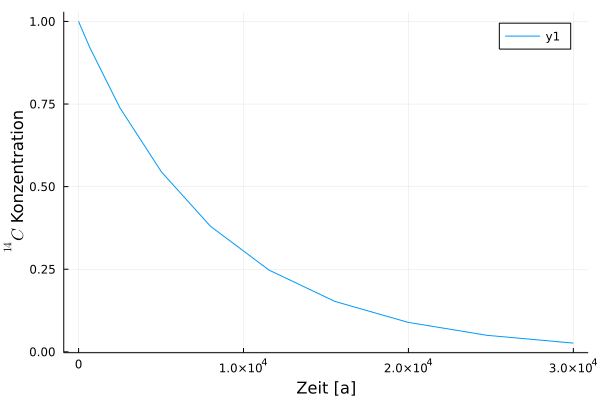

In [7]:
plot(sol.t, sol.u)
xlabel!("Zeit [a]")
ylabel!(L"$^{14}C$ Konzentration")

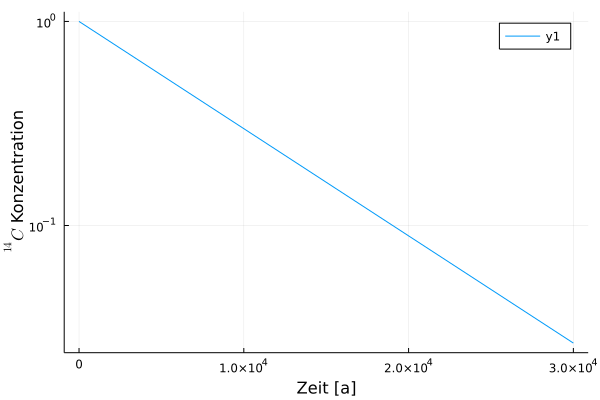

In [8]:
plot(sol.t, sol.u, yaxis=:log)
xlabel!("Zeit [a]")
ylabel!(L"$^{14}C$ Konzentration")

## Differentialgleichungen höherer Ordnung

Oft interessieren wir uns für DGLs höherer Ordnung, z.b. das Pohl'sche Rad:

$$\ddot\varphi + \alpha\dot\varphi + \Omega_0\varphi=A\sin(\Omega_E t)$$

Indem wir die Winkelgeschwindigkeit $\omega=\dot\varphi$ einführen, können wir diese DGL als ein System von gekoppelten DGLs erster Ordnung schreiben:

$$
\begin{aligned}
\dot\varphi &= \omega\\
\dot\omega &= -\alpha\omega - \Omega_0\varphi + A\sin(\Omega_E t)
\end{aligned}
$$

Problem definieren:

In [9]:
function damped_oscillator!(du, u, p, t)
    alpha, Omega0, A, OmegaE = p
    phi, omega = u
    du[1] = omega
    du[2] = - alpha * omega - Omega0 * phi + A * sin(OmegaE*t)
end

u0 = [1,0]
tspan = (0,20pi)
p = [0.2, 1, 0.3, 0.75]

prob = ODEProblem(damped_oscillator!, u0, tspan, p)

ODEProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 62.83185307179586)
u0: 2-element Vector{Int64}:
 1
 0

DGL lösen:

In [10]:
sol = solve(prob, saveat=0.05);

Plotten mit mehreren Unterplots:

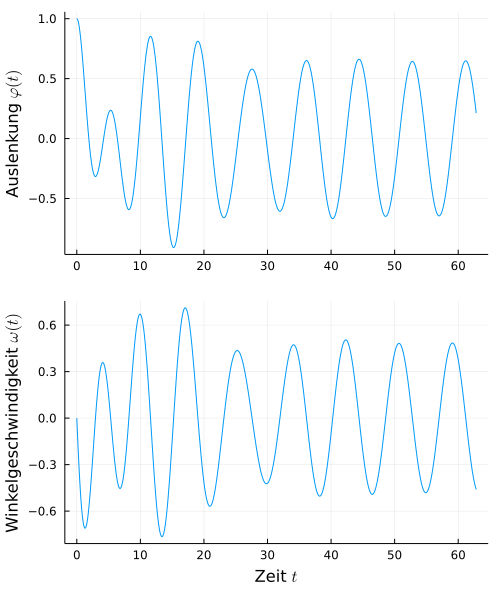

In [11]:
p1 = plot(sol.t, getindex.(sol.u,1),label=nothing)
ylabel!(L"Auslenkung $\varphi(t)$")
p2 = plot(sol.t, getindex.(sol.u,2),label=nothing)
xlabel!(L"Zeit $t$")
ylabel!(L"Winkelgeschwindigkeit $\omega(t)$")

# Beide Plots in einem Plot darstellen
plot(p1,p2,layout=(2,1),size=(500,600))

savefig("oszillator.pdf") # Plot als PDF speichern
plot!() # Plot anzeigen

In [12]:
arr = rand(10)

println(arr[3])
println(getindex(arr, 3))

0.7998548593181096
0.7998548593181096


## Lorenz-Attraktor

**Lorenz-Gleichungen** mit Parametern $\sigma,\rho,\beta$:

$$
\begin{aligned}
\frac{dx}{dt}&=\sigma(y-x)\\
\frac{dy}{dt}&=x(\rho-z)-y\\
\frac{dz}{dt}&=xy-\beta z
\end{aligned}
$$

Wir definieren ein entsprechendes `ODEProblem` mit festen Parametern $\sigma=10, \rho=28, \beta=8/3$

In [13]:
function lorenz!(du,u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;1.0;1.0]
tspan = (0.0,30.0)
prob = ODEProblem(lorenz!,u0,tspan)

sol = solve(prob, saveat=0.01);

Separieren der einzelnen Koordinaten aus dem Lösungsobjekt:

In [14]:
ux = getindex.(sol.u,1)
uy = getindex.(sol.u,2)
uz = getindex.(sol.u,3);

**Plotten in 3D:**

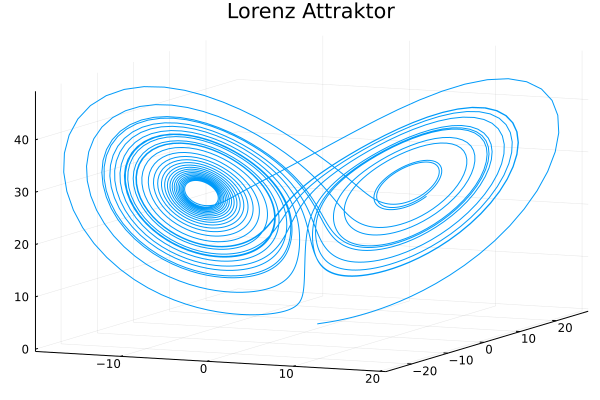

In [15]:
plot3d(ux,uy,uz,
        label=nothing,
        title = "Lorenz Attraktor")

**Animierter Plot:** 

[Dokumentation](https://docs.juliaplots.org/latest/animations/)

┌ Info: Saved animation to 
│   fn = /Users/markus/Cloud/synology/Teaching/Computerphysik/2022/compphys2022/tutorials/tmp.gif
└ @ Plots /Users/markus/.julia/packages/Plots/5S9Hg/src/animation.jl:114


Plots.AnimatedGif("/Users/markus/Cloud/synology/Teaching/Computerphysik/2022/compphys2022/tutorials/tmp.gif")
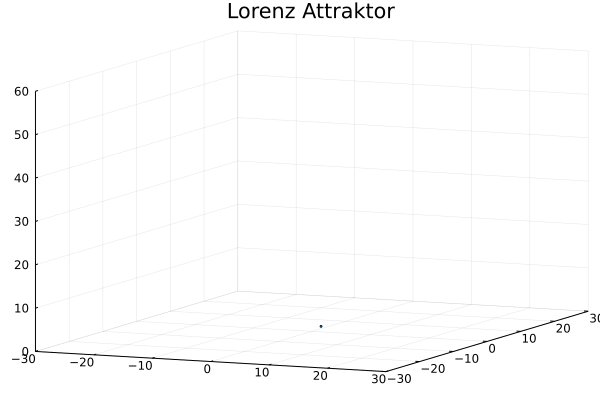

In [16]:
default() # Default engine von Plots.jl verwenden

plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attraktor",
    marker = 2,
    label=nothing
)

@gif for (x,y,z) in zip(ux,uy,uz)
    push!(plt,x,y,z)
end every 10

**Interaktiver Plot:**

Zunächst das `PlotlyJS` Paket laden, falls noch nicht installiert:

In [ ]:
import Pkg; Pkg.add("PlotlyJS")

Die Ausgabe der folgenden Zelle kann mit der Maus gedreht und gewendet werden.

In [17]:
plotlyjs() # PlotlyJS als Plots engine verwenden

# Plotten der Trajektorie in 3 dimensionen:
plot3d(ux,uy,uz,
        label=nothing,
        title = "Lorenz Attraktor")

WebIO._IJuliaInit()

┌ Warning: Kaleido is not available on this system. Julia will be unable to save images of any plots.
└ @ PlotlyJS /Users/markus/.julia/packages/PlotlyJS/4jzLr/src/kaleido.jl:65
┌ Warning: UndefVarError(:artifact_dir)
└ @ PlotlyJS /Users/markus/.julia/packages/PlotlyJS/4jzLr/src/kaleido.jl:66
